# Explore the distibution of birth years

In [34]:
import sqlite3 as sql
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

## Get the birth dates (or years) from the SQLite database


In [35]:
### Define the path to the file (a string in a variable 'db_file')
db_file = 'base de données/astronautes_import.db'

In [36]:
### Créer une connexion vers la base de données
# Attention: si la base de données n'existe pas, elle est créée à l'endroit indiqué.
# Ce qui est une manière de la créer si souhaité
try:
    cn = sql.connect(db_file)
except Exception as e:
    print(e)    
# Le contenu de la variable: connexion
# cn

In [37]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q1 = """
SELECT birth_year 
FROM person p
order by birth_year 
"""

In [38]:
### Création du conteneur du résultat de la requête
try:
    cur = cn.cursor()
except Exception as e:
    print(e)    

In [39]:
### Exécuter la requête et récupérer le résultat
cur.execute(q1)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()
cn.close()

In [40]:
### Inspecter le résultat:
# longueur, type du résultat et premières lignes du résultat
# On observe qu'il y a des trous et des répétitions:
# plusieurs personnes on la même année de naissance
print(len(r), '\n-----\n', type(r),  '\n-----\n', r[:5])

355 
-----
 <class 'list'> 
-----
 [(1934,), (1934,), (1934,), (1934,), (1934,)]


## Python control structures

Read and treat each element (e) of a list 
* A [Python list](https://datacarpentry.github.io/python-socialsci/02-basics.html#the-list)
* [*for* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-for-loop) (Datacarpentry tutorial)
* [*while* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-while-loop)
* [*if* statement](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-if-statement-and-variants)

In [41]:
### Result of SQL query: list of tuples
# five first elements
print(r[:5], '\n---')
# access the values
print(r[0], r[1], r[1][0])

[(1934,), (1934,), (1934,), (1934,), (1934,)] 
---
(1934,) (1934,) 1934


In [42]:
# 'for' loop on the first five elements
for e in r[:5]:
    print(e[0])

1934
1934
1934
1934
1934


In [43]:
# 'while' loop on the first five elements
i = 0
while i < 5 :
    print(r[i][0])
    i += 1

1934
1934
1934
1934
1934


In [44]:
# 'while' loop on the first 20 elements
# adding an if condition
i = 0
while i < 20 :
    # modulus: returns the reminder
    if r[i][0] % 5 == 0:
        print(r[i][0])
        i += 1
    else:
        i += 1    


1935
1935
1935
1935
1935
1935
1935
1935


## Prepare the data to be plotted

In [45]:
### Create a new list of values, not tuples
# create an empty list named 'lr'
lr = []

# add (append) each element (the first part of it) to the list 'lr'.
for e in r:
    lr.append(e[0])

print(lr[:5])

[1934, 1934, 1934, 1934, 1934]


In [46]:
### Test if all list elements are of type 'integer'
# Doc.: https://stackoverflow.com/questions/6009589/how-to-test-if-every-item-in-a-list-of-type-int
all(type(item) is int for item in lr)

True

In [47]:
### Extract the year from the date and convert value from string to integer
dt = '1934-01-01'
a = int(dt[:4]) ; a

1934

In [48]:
### Apply to the whole list:
# first, convert all values to string
# second, take only the first four characteurs, i.e. the year
# then convert to integer
lr = []
for e in r:
    lr.append(int((str(e[0]))[:4]))


print(lr[:5])    

[1934, 1934, 1934, 1934, 1934]


In [49]:
### Create a Pandas series (a particular list object)
slr = pd.Series(lr, name='Année')
print(slr[:2])

0    1934
1    1934
Name: Année, dtype: int64


In [50]:
slrg = slr.groupby(by=slr).size()
slrg.name='Année'
slrg.tail()

Année
1976    3
1977    2
1978    4
1983    1
1987    2
Name: Année, dtype: int64

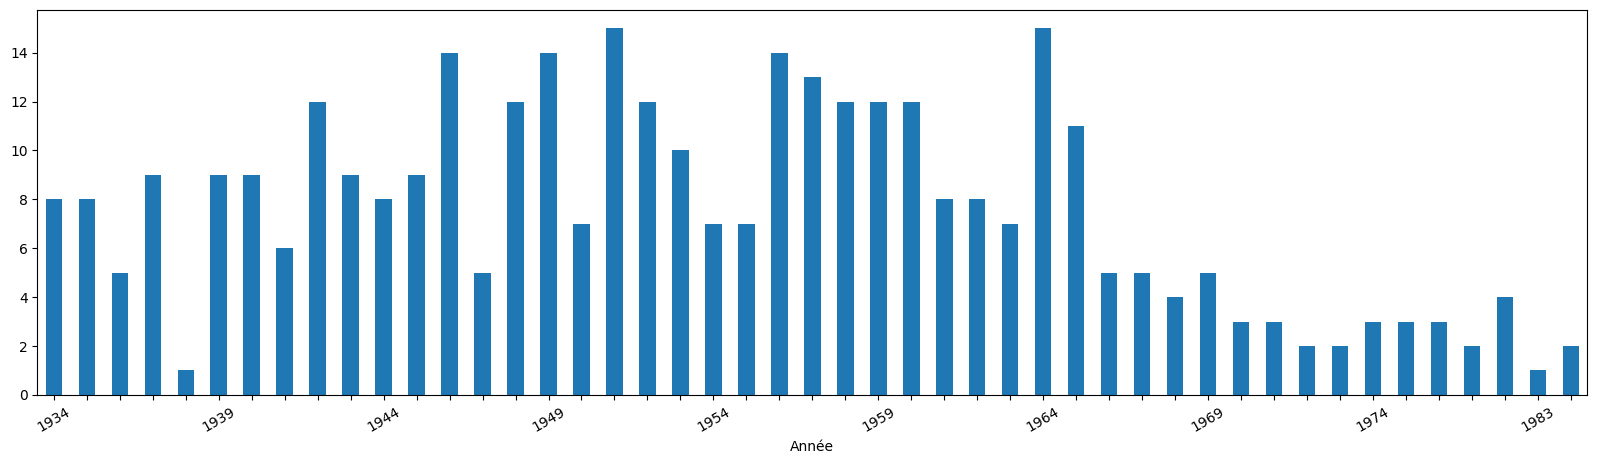

In [51]:
### Group by year and plot
# Beware : a lot of years are missing !
# Avoid this approach !

fig, ax = plt.subplots()



slrg.plot(kind='bar', figsize=(20, 5))

## specific xticks labels customisation
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=30)        
plt.show()

In [52]:

print (lr[:3], lr[-7:], 'Min: ' + str(min(lr)), 'Max: ' + str(max(lr)))


[1934, 1934, 1934] [1978, 1978, 1978, 1978, 1983, 1987, 1987] Min: 1934 Max: 1987


In [53]:
y_l = list(range(min(lr), max(lr) + 1, 1))
print(len(y_l),y_l[:7])

54 [1934, 1935, 1936, 1937, 1938, 1939, 1940]


In [54]:
### Count how many births there are per year
# Parse a list inside another list: can be slow for long lists !
# There are other methods, here we just want to illustrate the idea
y_r = []
for a in y_l:
    # initialize the counter for each year
    n = 0    
    for v in lr:        
        if v == a:
            n += 1
        else:
            pass    
    y_r.append([a,n])
print(y_r[:10])  

[[1934, 8], [1935, 8], [1936, 5], [1937, 9], [1938, 1], [1939, 9], [1940, 9], [1941, 6], [1942, 12], [1943, 9]]


In [55]:
### Create a Pandas dataframe (a kind of SQL table)
df_y_r = pd.DataFrame(y_r, columns=['year', 'number'])
df_y_r.tail(10)

,year,number
44,1978,4
45,1979,0
46,1980,0
47,1981,0
48,1982,0
49,1983,1
50,1984,0
51,1985,0
52,1986,0
53,1987,2


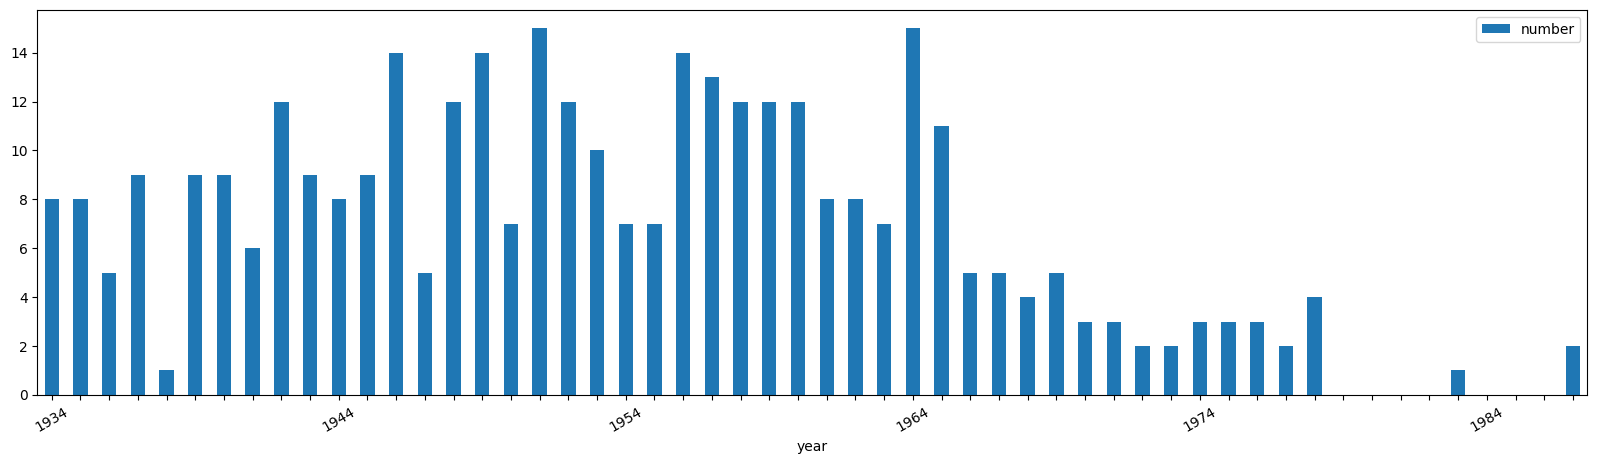

In [56]:
### Group by year and plot


fig, ax = plt.subplots()

df_y_r.plot(x='year', y='number',kind='bar', figsize=(20, 5), ax=ax)

## specific xticks labels customisation
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelsize=10,  rotation=30)
plt.show()

## Plot with the Plotly library

In [57]:
# The original series
print(slrg.head(), slrg.tail())

Année
1934    8
1935    8
1936    5
1937    9
1938    1
Name: Année, dtype: int64 Année
1976    3
1977    2
1978    4
1983    1
1987    2
Name: Année, dtype: int64


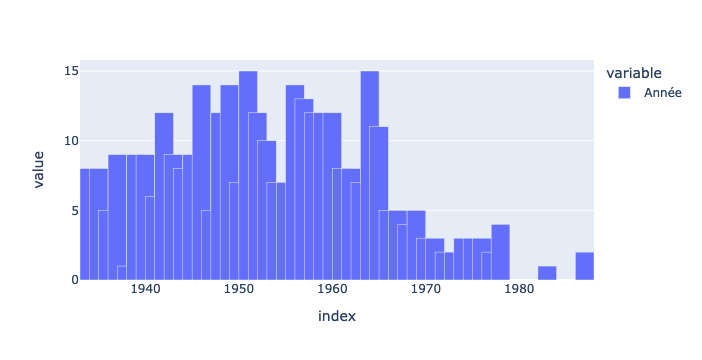

In [58]:
### Use a different plotting library: Plotly Express
# Observe the default behaviour of the library

fig = px.bar(slrg)
fig.update_traces(width=2)
fig.show()

### Codage par période de vingt-cinq ans

In [59]:
type(slrg), slrg.tail()

(pandas.core.series.Series,
 Année
 1976    3
 1977    2
 1978    4
 1983    1
 1987    2
 Name: Année, dtype: int64)

In [60]:
df_slrg = slrg.reset_index(name='Effectif')
df_slrg.tail(10)

,Année,Effectif
37,1971,3
38,1972,2
39,1973,2
40,1974,3
41,1975,3
42,1976,3
43,1977,2
44,1978,4
45,1983,1
46,1987,2


In [72]:
### Créer une liste d'années pour séparer en périodes de 25 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_25 = list(range(1934, 2002, 6))
print(l_25[:5],l_25[-5:])

[1934, 1940, 1946, 1952, 1958] [1976, 1982, 1988, 1994, 2000]


In [73]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

df_slrg['Périodes'] = pd.cut(df_slrg.Année, l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
df_slrg['Périodes'] = df_slrg['Périodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
df_slrg.head(3)

,Année,Effectif,Périodes
0,1934,8,1934-1939
1,1935,8,1934-1939
2,1936,5,1934-1939


In [74]:
### compter les naissances par périodes de 25 ans
df_slrg[['Périodes','Effectif']].groupby(by='Périodes').sum().head()

/tmp/ipykernel_220/3783518246.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Effectif
Périodes,
1934-1939,40
1940-1945,53
1946-1951,67
1952-1957,63
1958-1963,59


/tmp/ipykernel_220/2634518448.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



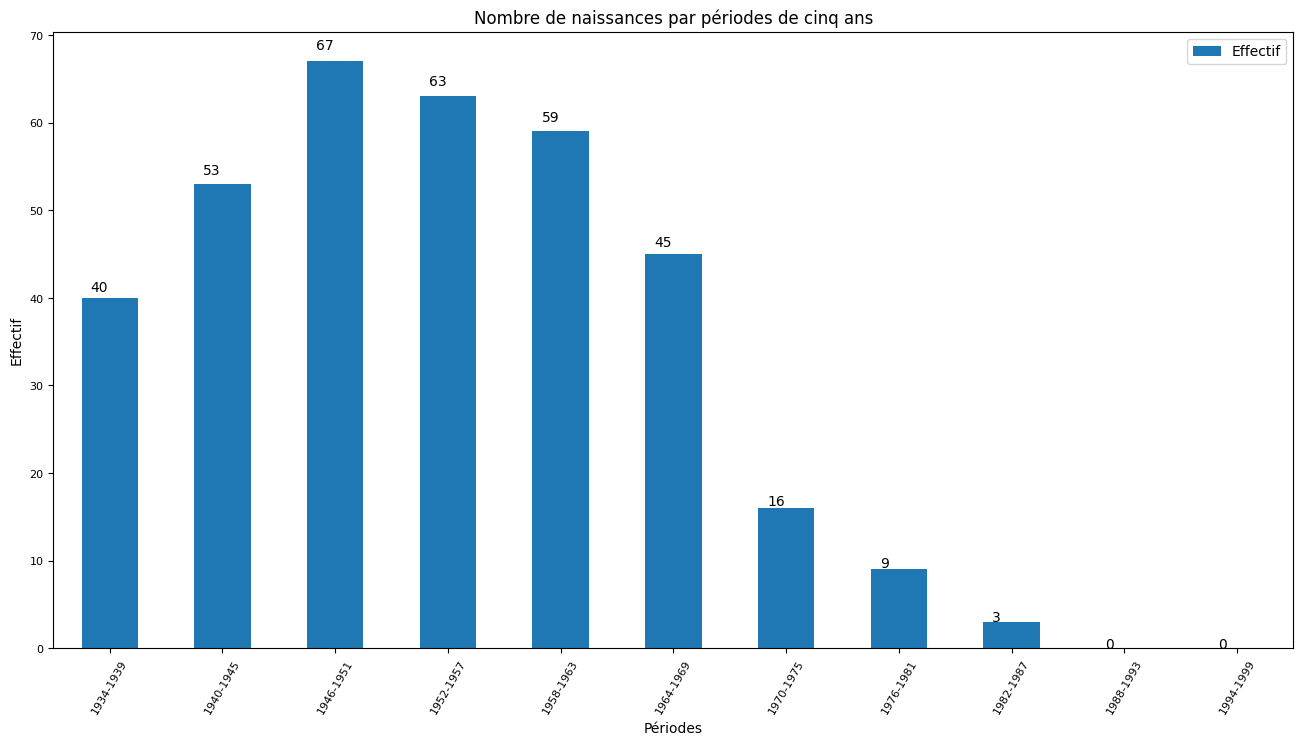

In [75]:
g_df = df_slrg[['Périodes','Effectif']].groupby(by='Périodes').sum()

ax = g_df.plot(kind='bar',rot=60, fontsize=8, figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.08 , p.get_height() * 1.02))
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Nombre de naissances par périodes de cinq ans')
plt.savefig('pictures/birth_years_plt_20241208.png')
plt.show()

In [76]:
pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
### Use a different plotting library

fig = px.bar(g_df, 
             # https://plotly.com/python/figure-labels/
             title='Effectifs des naissances par périodes de 5 ans',
             labels={'periodes':'Période',
                     'value':'Effectif',
                     'variable':'Effectif'},
                 width=1200, height=600)
fig.write_html("pictures/birth_years_20241209.html")
fig.write_image("pictures/birth_years_20241209.png")
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
